# Imports

In [ ]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
USERS_FILE_PATH = r'C:\Users\mathe\Documents\Projeto Ba\data\challenge-webmedia-e-globo-2023\files\treino'
file_names = [f'treino_parte{i}.csv' for i in range(1, 6)]
users_file_names = [os.path.join(USERS_FILE_PATH, f) for f in file_names]

dataframes = []

for i, file_path in enumerate(users_file_names):
    if i == 0: 
        df = pd.read_csv(file_path)
        header = df.columns
    else:
        df = pd.read_csv(file_path,
                         skiprows=1,
                         header=None,
                         names=header,
                         low_memory=False)
    dataframes.append(df) 

df_users_concat = pd.concat(dataframes, ignore_index=True)
df_users = df_users_concat.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

display(df_users.head(5))
display(df_users.tail())
display(df_users.info())

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41","20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe856057...","1656684240278, 1656761266729, 1656761528085, 1...","7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13, ...","6049, 210489, 8672, 10000, 30000, 123007, 9965...","25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.33...","1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1...","1656684240278, 1656761266729, 1656761528085, 1..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107,"04756569-593e-4133-a95a-83d35d43dbbd, 29b6b142...","1656678946256, 1656701076495, 1656701882565, 1...","0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, 0, 0, 44, 0,...","311274, 140000, 32515, 157018, 118689, 159243,...","67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71.9...","1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1...","1656678946256, 1656701076495, 1656701882565, 1..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56,"1f2b9c2f-a2d2-4192-b009-09065da8ec23, 04756569...","1658333312180, 1658404553818, 1658408449062, 1...","8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1...","182696, 91925, 30000, 273655, 126409, 42980, 1...","58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14.7...","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","1658333312180, 1658404553818, 1658408449062, 1..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4,"bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484a7...","1658766608801, 1658766608801, 1660084035094, 1...","579, 579, 7, 2","801396, 801396, 10000, 10000","78.74, 78.74, 16.71, 9.34","7, 7, 1, 1","1658766608801, 1658766608801, 1660084035094, 1..."


,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
499995,2577444c60e7e1894b120b966031b66c08f696101a085f...,Non-Logged,4,"82206221-05a0-4f89-aa10-e8c8dc0cc418, bfb94228...","1656864715643, 1658103612200, 1659107526581, 1...","36, 50, 1, 7","20000, 74626, 10000, 10000","40.53, 45.76, 11.34, 18.25","1, 2, 1, 1","1656864715643, 1658103612200, 1659107526581, 1..."
499996,4325f2bbeed10d10868190e2f66e700621c04b63eebefd...,Non-Logged,2,"34a692f5-46f7-482a-918d-c1094fb314d5, 2bdb2c3c...","1657392105652, 1657659516405","28, 1","74694, 7149","12.42, 7.45","6, 1","1657392105652, 1657659516405"
499997,0ca60effb4a0f595cf838c95a4d3a417f02bb7edeaf659...,Non-Logged,4,"08126a08-b06e-4dc2-9c70-26922c14f465, ad0b3a0f...","1660154775574, 1660160541327, 1660160550596, 1...","2, 2, 7, 1","54143, 7915, 37776, 18911","33.27, 33.7, 50.1, 14.95","2, 1, 1, 1","1660154775574, 1660160541327, 1660160550596, 1..."
499998,c07adf21d372ebc50752555fdfbc949e164d98d06d094f...,Logged,14,"bc625312-eb34-4f23-a281-499f1da183b4, cee20002...","1657201926509, 1657202207327, 1657541602224, 1...","1, 0, 3, 0, 0, 0, 0, 1, 6, 0, 1, 8, 25, 6","50000, 71013, 160000, 40000, 68795, 20008, 472...","50.45, 50.45, 49.19, 32.09, 14.15, 26.19, 25.6...","1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1","1657201926509, 1657202207327, 1657541602224, 1..."
499999,5889d6ebbf62e6c115e0a280063dc8189cca490cbfea56...,Non-Logged,13,"1f32787b-de2b-49be-8c20-ddaeae34cc22, a36c98b5...","1656781278064, 1656867878637, 1656936160322, 1...","23, 16, 36, 13, 56, 23, 1, 33, 64, 76, 14, 26, 44","140000, 110000, 170000, 66541, 250000, 90000, ...","92.61, 34.37, 53.41, 31.74, 99.36, 84.68, 32.9...","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1","1656781278064, 1656867878637, 1656936160322, 1..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   userId                   500000 non-null  object
 1   userType                 500000 non-null  object
 2   historySize              500000 non-null  int64 
 3   history                  500000 non-null  object
 4   timestampHistory         500000 non-null  object
 5   numberOfClicksHistory    500000 non-null  object
 6   timeOnPageHistory        500000 non-null  object
 7   scrollPercentageHistory  500000 non-null  object
 8   pageVisitsCountHistory   500000 non-null  object
 9   timestampHistory_new     500000 non-null  object
dtypes: int64(1), object(9)
memory usage: 38.1+ MB


None

In [54]:
NEWS_FILES_PATH = r'C:\Users\mathe\Documents\Projeto Ba\data\challenge-webmedia-e-globo-2023\itens\itens'
file_names = [f'itens-parte{i}.csv' for i in range(1, 3)]
news_file_names = [os.path.join(NEWS_FILES_PATH, f) for f in file_names]

dataframes = []

for i, file_path in enumerate(news_file_names):
    if i == 0: 
        df = pd.read_csv(file_path)
        header = df.columns
    else:
        df = pd.read_csv(file_path,
                         skiprows=1,
                         header=None,
                         names=header,
                         low_memory=False)
    dataframes.append(df)

df_news_concat = pd.concat(dataframes, ignore_index=True)
df_news = df_news_concat.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

display(df_news.head(5))
display(df_news.tail())
display(df_news.info())

,page,url,issued,modified,title,body,caption
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"Após 2 votos, pedido de vista suspende julgame...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic..."


,page,url,issued,modified,title,body,caption
199995,aca76b7b-9c02-4070-a4a9-00f8c9b4dae2,http://g1.globo.com/politica/eleicoes/2022/not...,2022-04-18 23:32:54+00:00,2022-05-02 10:53:35+00:00,"Eleições: título de eleitor cancelado, o que f...",Detalhe da urna eletrônica e a tecla confirma\...,Cidadão pode consultar a situação do título de...
199996,20de2172-b557-4881-8c55-2706db029e9b,http://g1.globo.com/politica/eleicoes/2022/not...,2022-08-09 00:53:27+00:00,2022-09-19 20:30:25+00:00,Plano de governo: Ciro Gomes (PDT),"Candidato do PDT à Presidência da República, C...","Em documento de 26 páginas, candidato à Presid..."
199997,347c7e3d-ff53-4ba0-8de7-8bb860b04a88,http://g1.globo.com/politica/eleicoes/2022/not...,2022-03-15 18:18:54+00:00,2022-03-15 18:26:34+00:00,Moro vê economia brasileira estagnada e diz qu...,O pré-candidato do Podemos à Presidência da Re...,Ex-ministro da Justiça de Bolsonaro e pré-cand...
199998,26f7ff70-46da-42d2-9354-578e8f828a16,http://g1.globo.com/politica/eleicoes/2022/not...,2022-03-23 15:13:50+00:00,2022-03-24 00:54:34+00:00,Lula é hoje 'aquele que melhor reflete o senti...,"Ex-governador de SP, Geraldo Alckmin se filia ...",Ex-governador de SP deu a declaração durante a...
199999,3f92cc42-ccc2-425c-931a-fe77a2a752a0,http://g1.globo.com/politica/eleicoes/2022/not...,2022-06-30 14:08:19+00:00,2022-06-30 14:32:37+00:00,Cota de gênero nas eleições deve ser respeitad...,O Tribunal Superior Eleitoral (TSE) afirmou ne...,Corte respondeu a uma consulta feita pela fede...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      200000 non-null  object
 1   url       200000 non-null  object
 2   issued    200000 non-null  object
 3   modified  200000 non-null  object
 4   title     200000 non-null  object
 5   body      200000 non-null  object
 6   caption   200000 non-null  object
dtypes: object(7)
memory usage: 10.7+ MB


None

# Análise de Comportamento do Usuário

### Quantidade de clicks por usuário

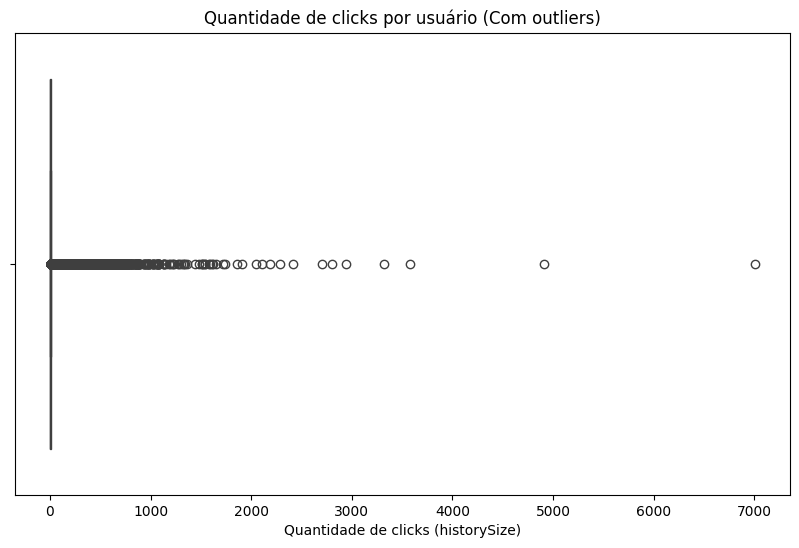

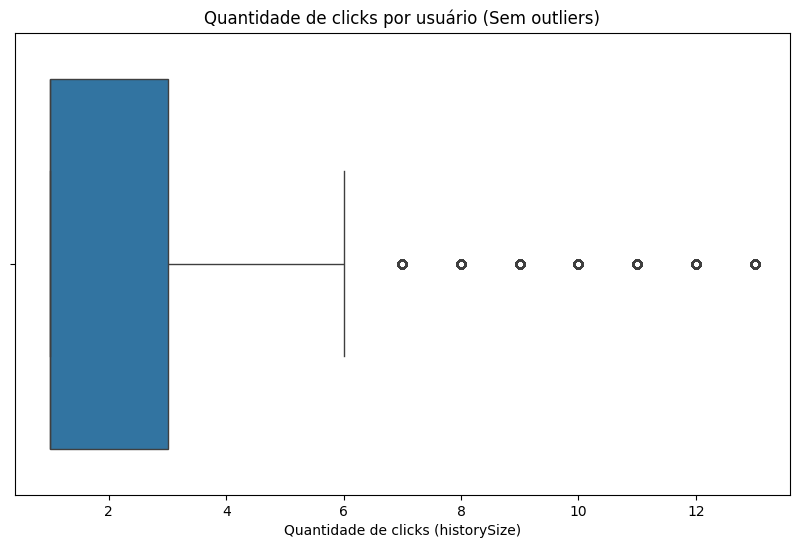

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_users["historySize"])
plt.title("Quantidade de clicks por usuário (Com outliers)")
plt.xlabel("Quantidade de clicks (historySize)")
plt.show()

Q1 = df_users["historySize"].quantile(0.25)
Q3 = df_users["historySize"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df_users[(df_users["historySize"] > lower_bound) & (df_users["historySize"] < upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["historySize"])
plt.title("Quantidade de clicks por usuário (Sem outliers)")
plt.xlabel("Quantidade de clicks (historySize)")
plt.show()

### Tempo Gasto na Página

0    0.34
1    0.35
2    0.59
dtype: float64

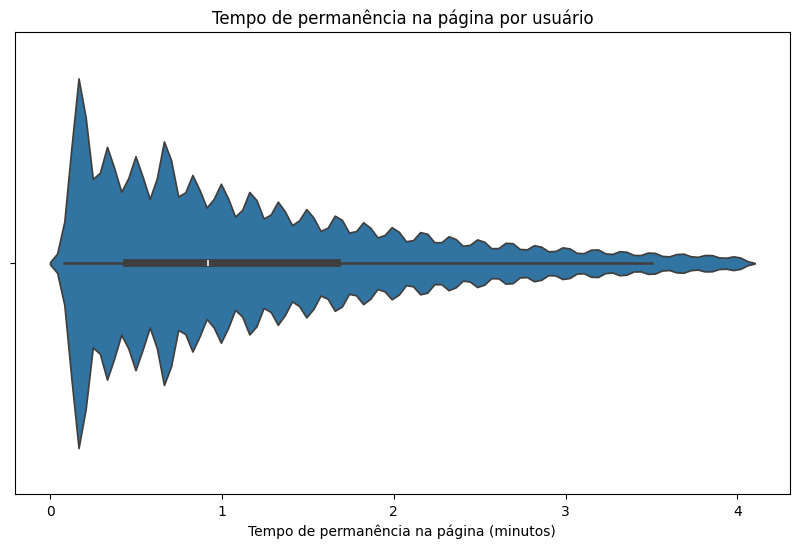

In [56]:
time_on_page_list = []

for row in df_users['timeOnPageHistory']:
    if pd.notna(row):
        values = row.split(',')
        time_on_page_list.extend([float(value) for value in values])

time_on_page_exploded = pd.Series(time_on_page_list)    
time_on_page_exploded = (time_on_page_exploded / 60000).round(2)
display(time_on_page_exploded.head(3))

Q1 = time_on_page_exploded.quantile(0.25)
Q3 = time_on_page_exploded.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
time_on_page_filtered = time_on_page_exploded[(time_on_page_exploded > lower_bound) & (time_on_page_exploded < upper_bound)]

plt.figure(figsize=(10, 6))
sns.violinplot(x=time_on_page_filtered)
plt.title("Tempo de permanência na página por usuário")
plt.xlabel("Tempo de permanência na página (minutos)")
plt.show()


### Média de Scroll

0    50.30
1    18.18
2    16.46
dtype: float64

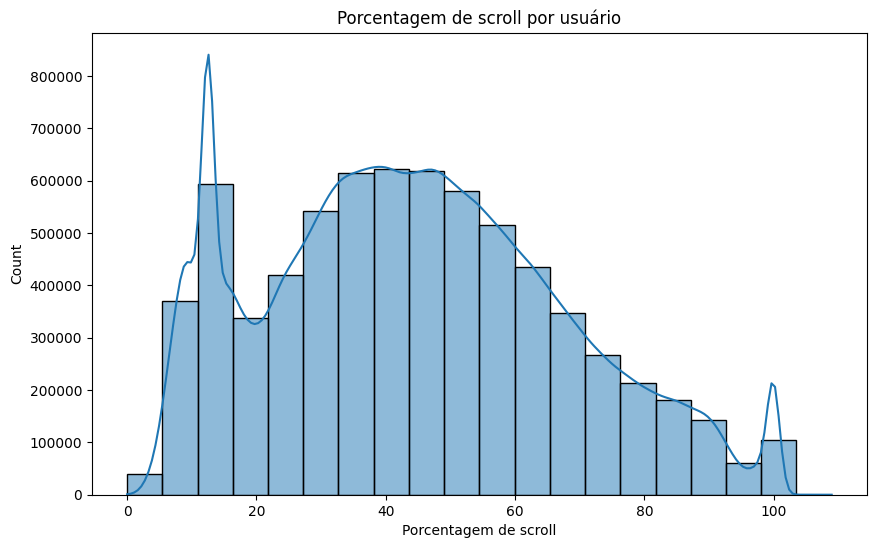

In [57]:
scoll_list = []

for row in df_users['scrollPercentageHistory']:
    if pd.notna(row):
        values = row.split(',')
        scoll_list.extend([float(value) for value in values])

scoll_exploded = pd.Series(scoll_list)
display(scoll_exploded.head(3))

Q1 = scoll_exploded.quantile(0.25)
Q3 = scoll_exploded.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
scoll_filtered = scoll_exploded[(scoll_exploded > lower_bound) & (scoll_exploded < upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(x=scoll_filtered, bins=20, kde=True)
plt.title("Porcentagem de scroll por usuário")
plt.xlabel("Porcentagem de scroll")
plt.show()

### Palavras Mais Frequentes nos Títulos

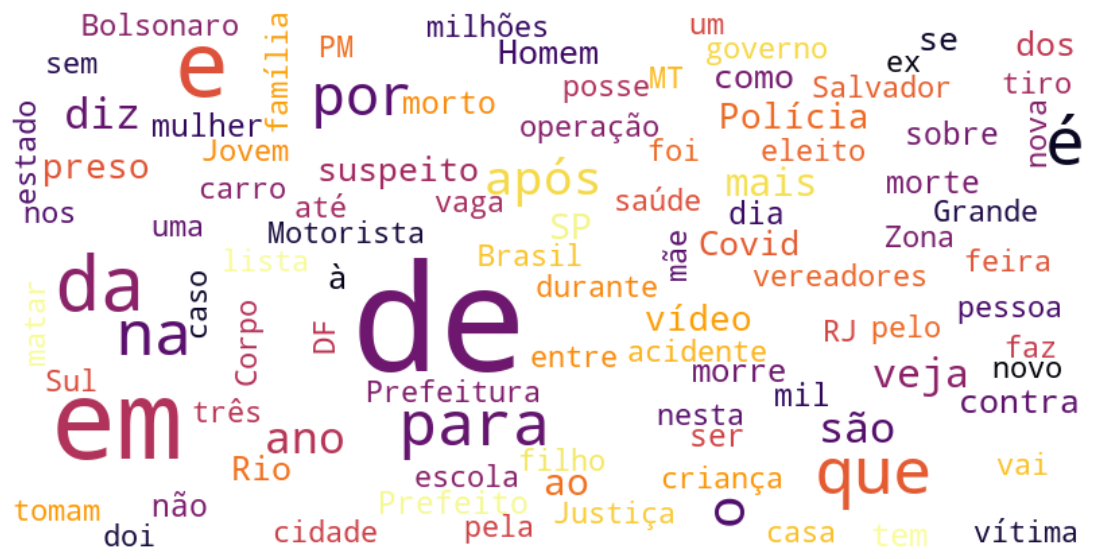

In [ ]:
wc = WordCloud(width=800, 
                      height=400, 
                      max_font_size=110, 
                      collocations=False,
                      max_words=100,
                      colormap='inferno',  # Use a colormap diferente
                      background_color='white'  # Defina a cor de fundo para branco
                     ).generate(' '.join(df_news_concat['title']))

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Distribuiçao de Noticias por Tempo 

A tabela de noticias possui dados de 2014-07-31 08:00:01+00:00 até 2022-08-15 02:57:16+00:00


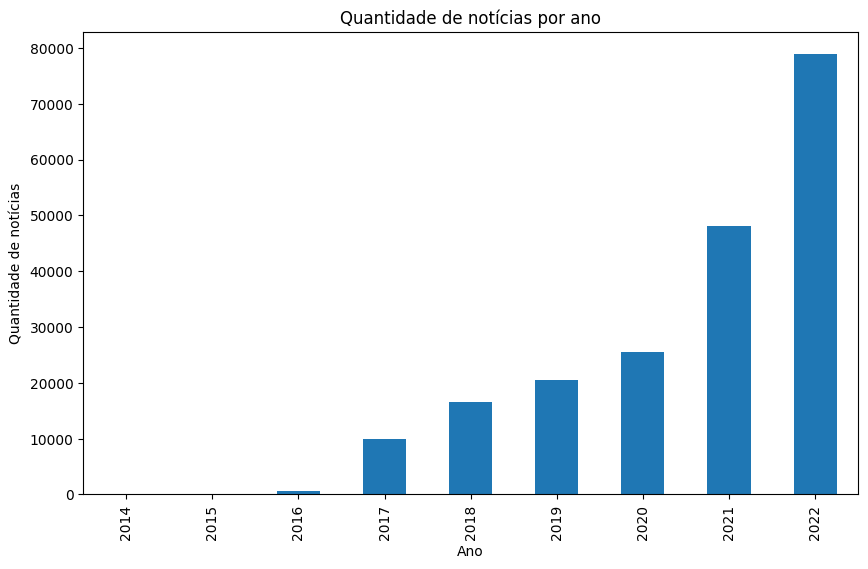

In [60]:
max_value = df_news['issued'].max()
min_value = df_news['issued'].min()
print(f"A tabela de noticias possui dados de {min_value} até {max_value}")

df_news['issued'] = pd.to_datetime(df_news['issued'])
plt.figure(figsize=(10, 6))
df_news['issued'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Quantidade de notícias por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de notícias")
plt.show()

### 10 Notícias Mais Clicadas

In [63]:
df_users_exploded = df_users.assign(history=df_users['history'].str.split(',')).explode('history')
merged_df = pd.merge(df_users_exploded, df_news, left_on='history', right_on='page')

clicks_per_news = merged_df['page'].value_counts()

top_10_news = clicks_per_news.head(10).index

top_10_titles = df_news[df_news['page'].isin(top_10_news)]['title'].tolist()

print("Top 10 notícias mais clicadas:")
for title in top_10_titles:
    print(title)

Top 10 notícias mais clicadas:
Imigração para o Canadá: crise, violência e facilidade de residência fazem fluxo de brasileiros explodir
Jovem conta ter gastado R$ 9 mil após tomar zolpidem; entenda o que é o medicamento e os riscos
Como podemos evitar a poluição das águas?
Filha é presa por golpe estimado em R$ 725 milhões contra a mãe; quadros renomados roubados foram recuperados
Jô Soares, ícone do humor e da TV, morre em São Paulo aos 84 anos
'Me olham com estranheza': brasileiros contam como é ter um chip implantado na mão
Mulher é vítima de racismo em shopping no litoral de SP; agressora foi presa em flagrante
VÍDEO: ‘Me ajuda, por favor! Não! Socorro!’, suplicou influenciadora; Vanderlei Bambam foi preso em flagrante por agredir a namorada
Policial que matou lutador Leandro Lo foi a boate e ao motel após o crime
Designer de sobrancelhas viraliza na web ao fazer pegadinha com cliente: 'Difícil segurar a risada'
